# **Deep Learning - Plant Disease Classification Project**

# **Steps used in the Project**

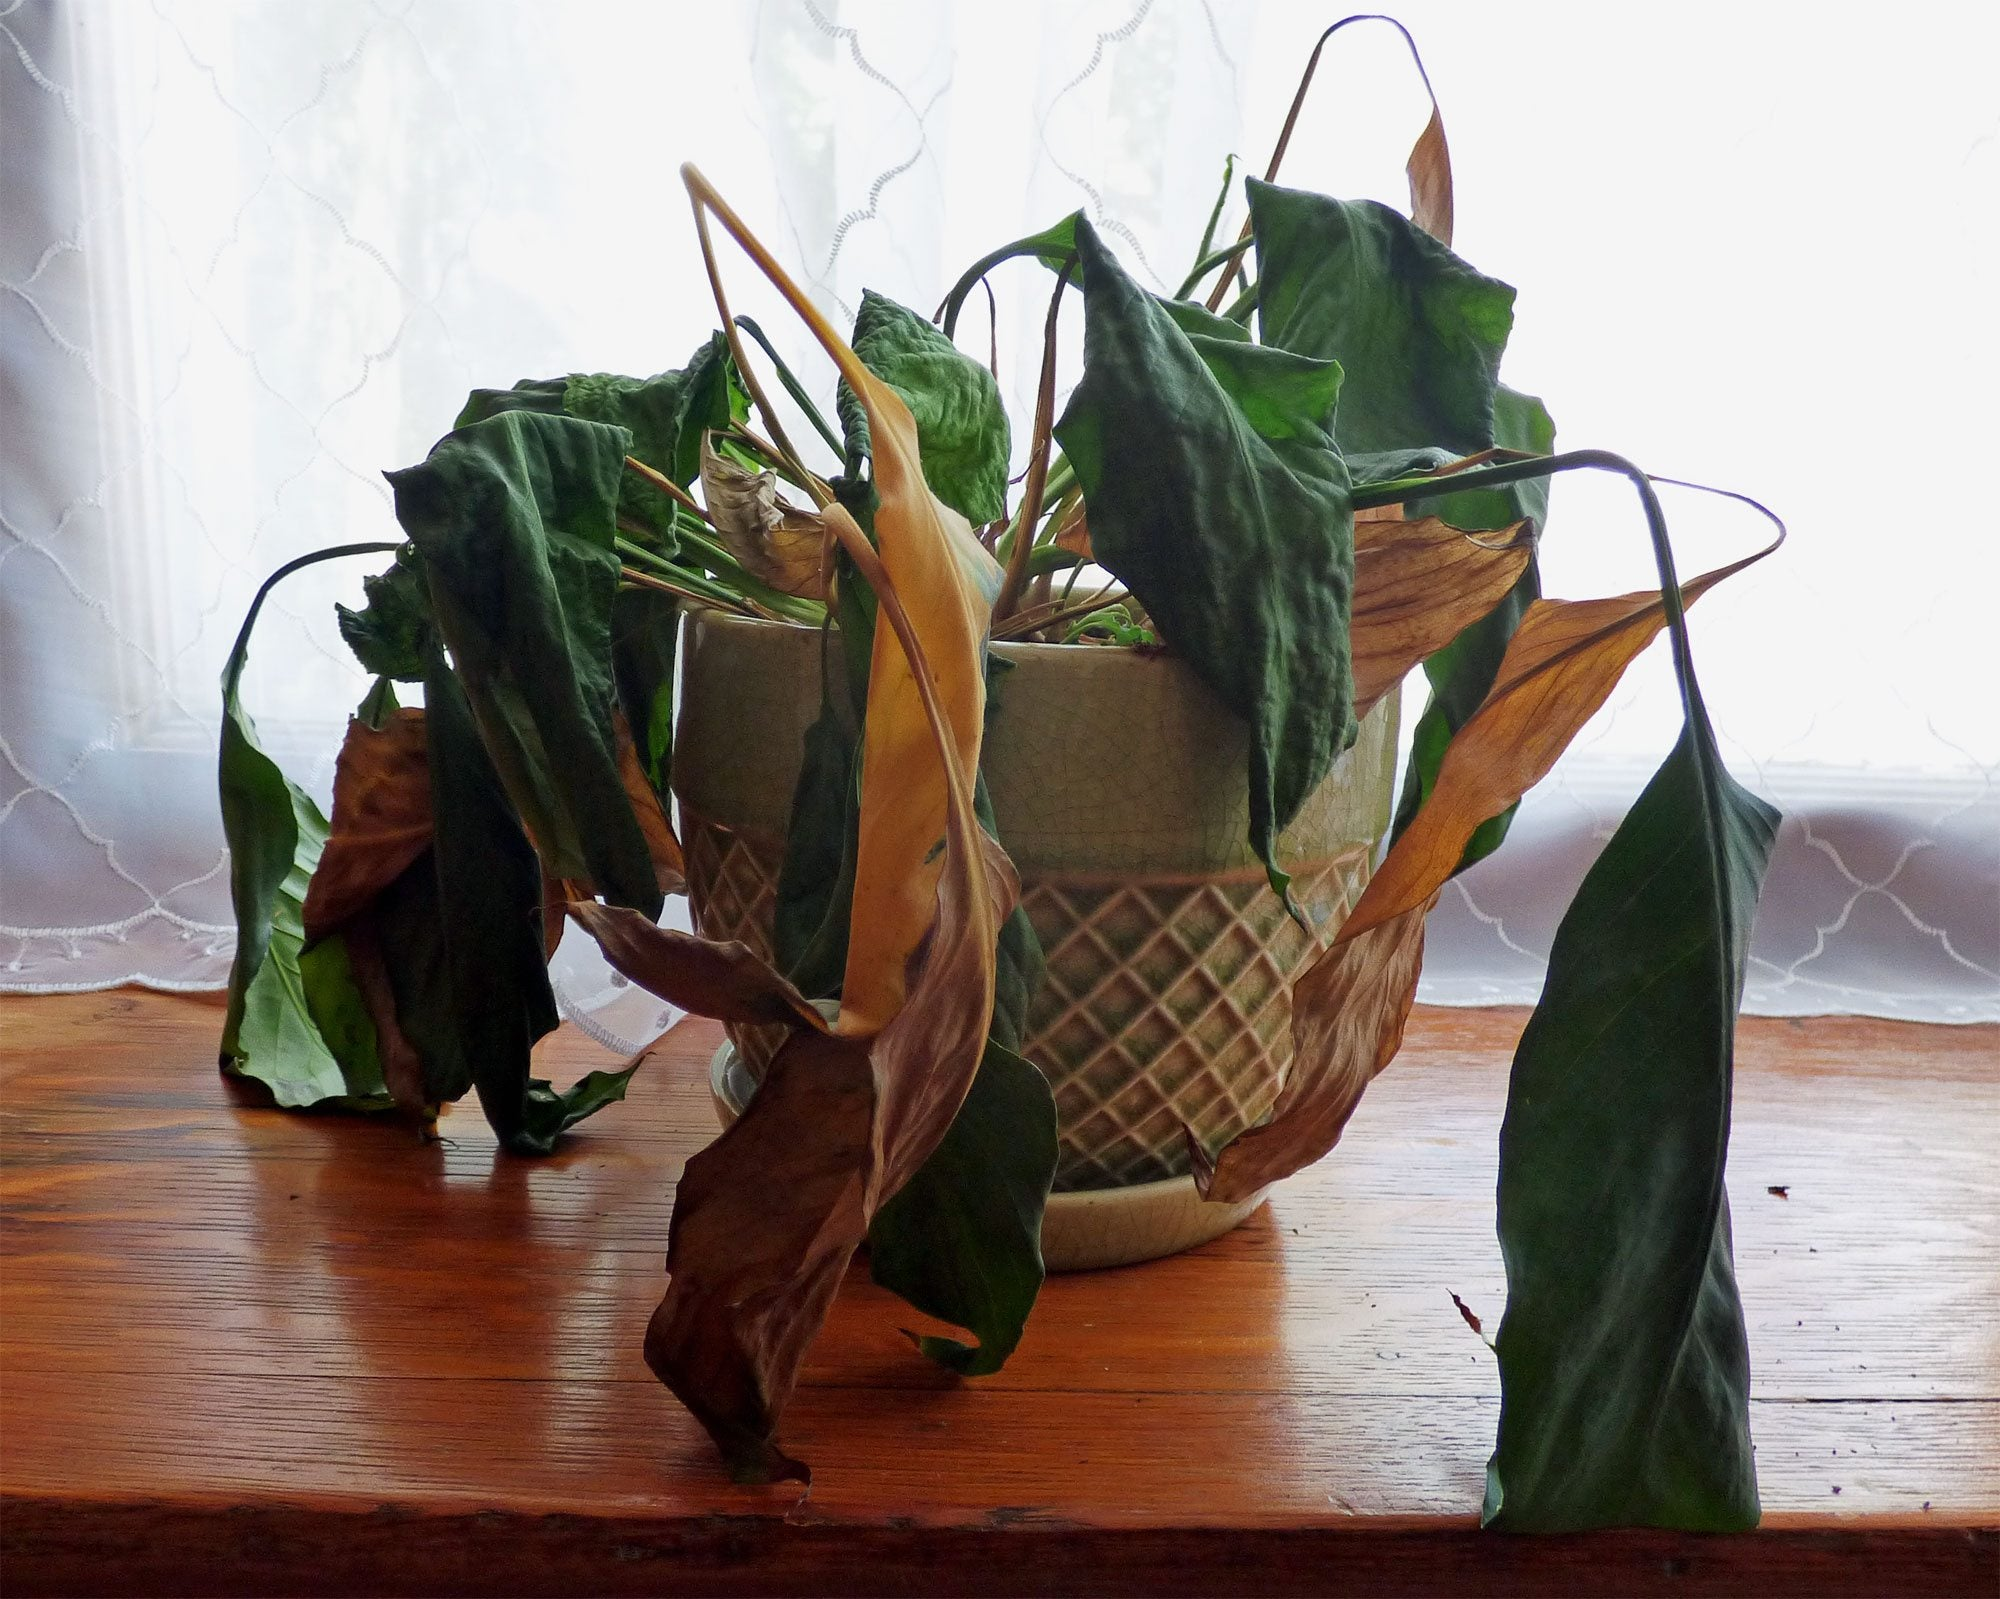*   **Importing libraries**
*   **Dataset Loading**
*   **Visualizing Images**
*   **Model Training**
*   **Model Compiling**
*   **Model Evaluation**
*   **Confusion Matrix**



#**Importing Libraries to be used in the project**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import InputLayer,Dense,Conv2D, MaxPooling2D,Flatten,Resizing,Rescaling
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError,SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


# **Dataset Loading**

In [ ]:
!pip install -q kaggle

**Making kaggle directory and copying kaggle.json**

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

**Downloading the dataset**

In [ ]:
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

100% 1.24G/1.25G [00:40<00:00, 30.0MB/s]
100% 1.25G/1.25G [00:40<00:00, 32.9MB/s]


**Unzipping the data**

In [ ]:
!unzip "/content/plant-disease-recognition-dataset.zip" -d "/content/dataset/"

Archive:  /content/plant-disease-recognition-dataset.zip
  inflating: /content/dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e7986d1ecd36445.jpg  
  inflating: /conten

**Important Variables to be used later in the project**

In [ ]:
TRAIN_PATH="/content/dataset/Train/Train"
TESTING_PATH="/content/dataset/Test/Test"
VALIDATION_PATH="/content/dataset/Validation/Validation"
CLASSES=["Healthy","Powdery","Rust"]

**Making training , testing and validation path**

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

Found 1322 files belonging to 3 classes.


In [ ]:
test = tf.keras.utils.image_dataset_from_directory(
    TESTING_PATH,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)


Found 150 files belonging to 3 classes.


In [ ]:
val = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_PATH,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)


Found 60 files belonging to 3 classes.


# **Seeing images in our dataset**

**Displaying Single image**

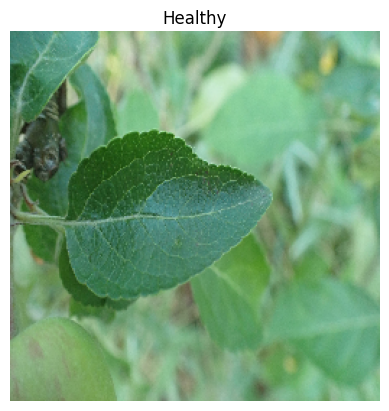

In [ ]:

for img,lab in test.take(1):
  for i in range(1):
    plt.imshow(img[i]/255)
    plt.title(CLASSES[lab[i]])
    plt.axis("off")

**Displaying Multiple image**

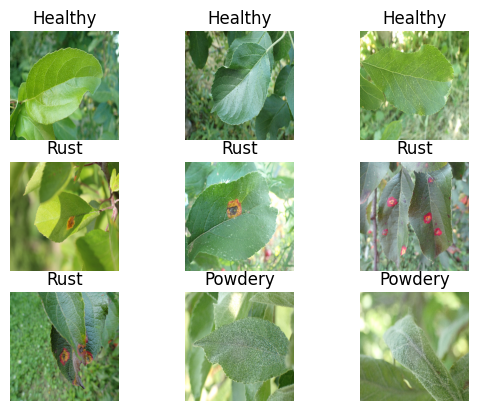

In [ ]:
for img,lab in train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i]/255)
    plt.title(CLASSES[lab[i]])
    plt.axis("off")

# **Model Traning**

In [ ]:
model=tf.keras.models.Sequential([
    InputLayer(input_shape=(256,256,3)),

    Resizing(224,224),
    Rescaling(1./255),

    Conv2D(filters=32,kernel_size=3,activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64,kernel_size=3,activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=128,kernel_size=3,activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=128,kernel_size=3,activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),

    Dense(units=1024,activation="relu"),
    Dense(units=512,activation="relu"),
    Dense(units=128,activation="relu"),
    Dense(units=64,activation="relu"),
    Dense(units=len(CLASSES),activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

**Plotting model**


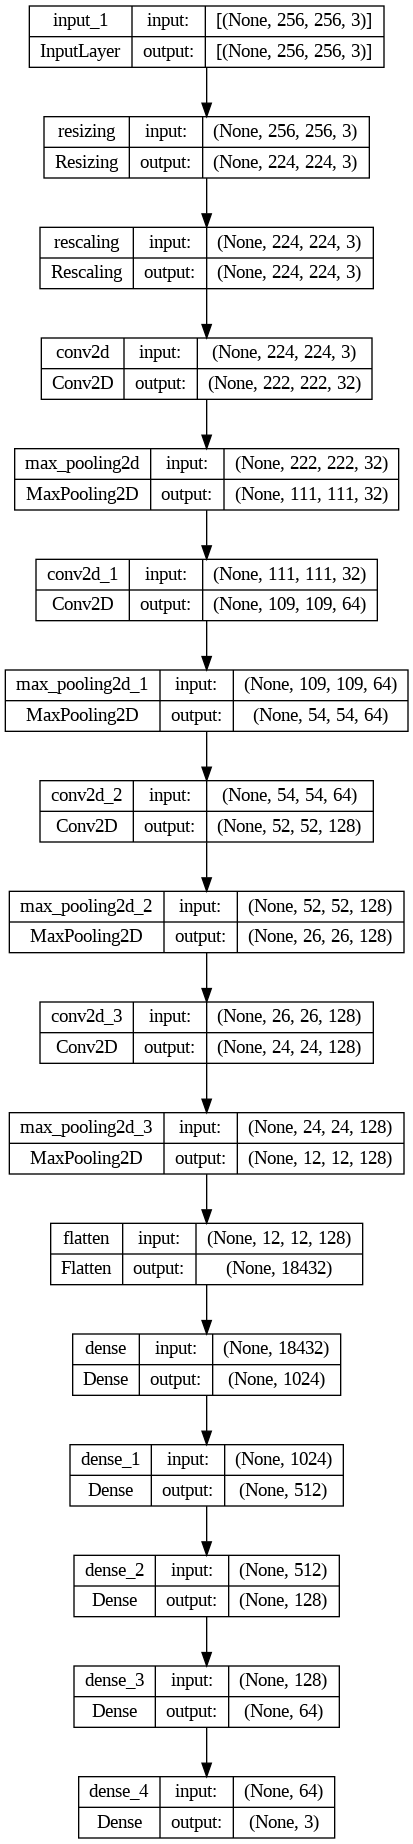

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

**Compiling Model**

In [ ]:
from tensorflow.keras.metrics import Precision  ,Recall , Accuracy
from tensorflow.keras.metrics import TruePositives , FalsePositives  , TrueNegatives , FalseNegatives ,AUC,BinaryAccuracy

In [ ]:
metrics=[TruePositives() , FalsePositives() , TrueNegatives() , FalseNegatives() ]

In [ ]:

model.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(train, epochs=2, validation_data=val)

Epoch 1/2
42/42 [==============================] - 305s 7s/step - loss: 0.9232 - accuracy: 0.5204 - val_loss: 0.6574 - val_accuracy: 0.6333
Epoch 2/2
42/42 [==============================] - 272s 6s/step - loss: 0.6280 - accuracy: 0.7421 - val_loss: 0.6439 - val_accuracy: 0.7667


**Plotting loss and accuracy graph**

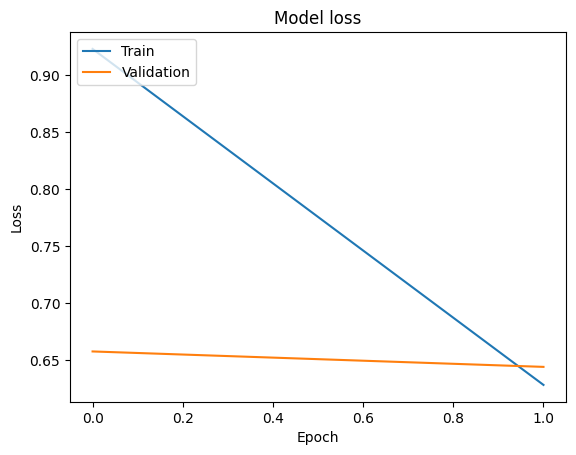

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


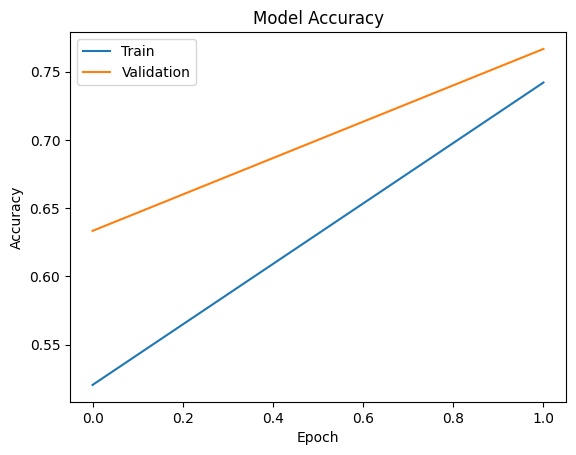

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **Evaluating Our model**

**58% Accuracy**

In [ ]:
model.evaluate(test)

5/5 [==============================] - 11s 1s/step - loss: 0.4471 - accuracy: 0.8400


[0.4470633864402771, 0.8399999737739563]

**Testing on Multiple images**

1/1 [==============================] - 0s 52ms/step


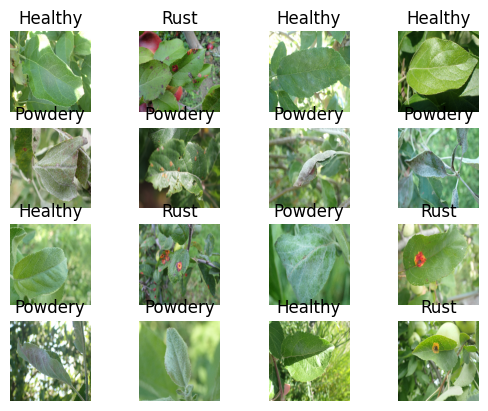

In [ ]:
for im,lab in test.take(1):
  for i in range(16):
    image=im[i]
    image=tf.expand_dims(image,axis=0)
    ans=np.argmax(model.predict(image))

    plt.subplot(4,4,i+1)
    plt.imshow(im[i]/255)
    plt.title(CLASSES[ans])
    plt.axis("off")


**Testing on image outside the dataset**

1/1 [==============================] - 0s 53ms/step


Text(0.5, 1.0, 'Rust')

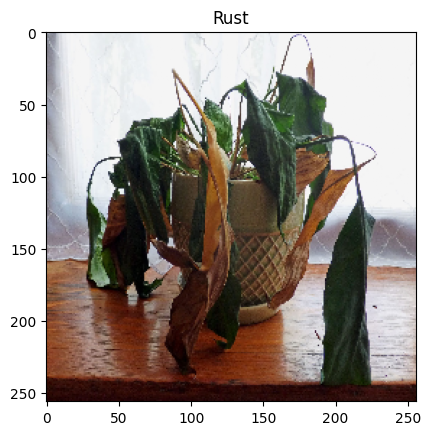

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/image.jpg", target_size=(256, 256))
img = image.img_to_array(img)
plt.imshow(img/255)
img = tf.expand_dims(img,axis=0)
a=model.predict(img)
ans=np.argmax(a)
# plt.imshow(img)
plt.title(CLASSES[ans])


# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix , roc_curve

In [ ]:
Labels=[]
pred=[]
for im,lab in test.take(1):
    for i in range(32):
      image=im[i]
      image=tf.expand_dims(image,axis=0)
      ans=np.argmax(model.predict(image))

      Labels.append(int(lab[i]))
      pred.append(ans)

print(Labels)
print(pred)

1/1 [==============================] - 0s 54ms/step
[1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1]


In [ ]:
cm=confusion_matrix(Labels,pred)
cm

array([[10,  3,  0],
       [ 0, 13,  0],
       [ 1,  1,  4]])

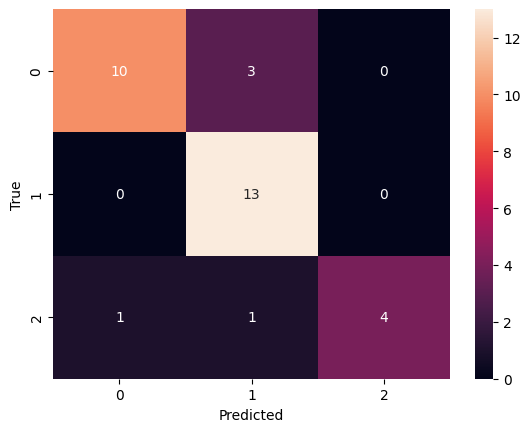

In [32]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()